<a href="https://colab.research.google.com/github/alisterpage/CHEM3580-Jupyter-Notebooks/blob/main/H2_phasespace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase Space - Vibration of H$_{2}$

Let's look more closely at the vibrational motion in the H$_{2}$ molecule. 

We have seen already that, provided the nuclei do not deviate too far from their equilibrium position, the potential energy surface for this molecule can be approximated as a simple harmonic potential,

<center> $U_{\text{stretch}} = k(\Delta R)^{2}$.</center>

Run the two code cells below. Click play to see how the energy of the molecule changes with the H-H bond length as a function of time Use the controls to control the speed etc. of the animation.



In [1]:
!pip install ipympl -q 2>&1 >/dev/null

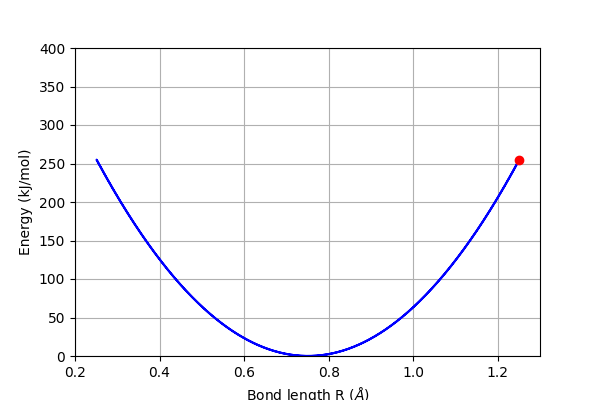

In [2]:
#@title
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import output
output.enable_custom_widget_manager()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#declare globals
xmin=0.751
k = 1020.0
A = 0.5
m = 1.08*1.08/(1.08+1.08)
w = np.sqrt(k/m)
x0=xmin
tstart=0.0
tend=2*np.pi/w
tarray = np.linspace(tstart,tend, 2000)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(w,t,A):
    return A*np.cos(w*t)

def harmonic_momentum(w,t,m):
    return -m*w*np.sin(w*t)


#@title
# create the play widget
play = widgets.Play(
    value=0.751,
    min=0.351,
    max=1.151,
    step=0.01,
    interval=100,
    description="Bond length R ($\AA$)",
    disabled=False,
)

# create the slider widget
slider = widgets.FloatSlider(
    value=0.751,
    min=0.351,
    max=1.151,
    step=0.01,
    description="Bond length R ($\AA$)",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)

# link the play widget and slider widget
widgets.jslink((play, "value"), (slider, "value"))

# create plot
fig, ax = plt.subplots(figsize=(6, 4), gridspec_kw={'wspace': 0.4})
tarray = np.linspace(tstart,tend, 2000)
ax.set_ylim([0, 400])
ax.set_xlim([0.2,1.3])
ax.set_ylabel("Energy (kJ/mol)")
ax.set_xlabel("Bond length R ($\AA$)")
ax.grid(True)

curve_line, = ax.plot(xmin+harmonic_position(w,tarray,A), harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin),color='blue')
marker_line, = ax.plot(xmin+harmonic_position(w,play.value,A), harmonic_energy(k, xmin+harmonic_position(w,play.value,A), xmin), marker="o", color='red')

# function to update the marker position
def update_marker(r):
    marker_line.set_xdata(xmin+harmonic_position(w,r,A))
    marker_line.set_ydata(harmonic_energy(k,xmin+harmonic_position(w,r,A),xmin))


# function to update the plot
def update_plot(r):
    #curve_line, = ax.plot(xmin+harmonic_position(w,tarray,A), harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin),color='blue')
    curve_line.set_ydata(harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin))
    update_marker(r)

In [3]:
#@title
# create the animation using FuncAnimation
ani = FuncAnimation(fig, update_plot, frames=np.arange(0.351, 1.151, 0.01), interval=15, repeat=True)

# display the widgets and animation
widgets.VBox([slider, play])
HTML(ani.to_jshtml())


Is there a more useful way of visualising the vibrational motion of this bond?? Let's consider how the bond length itself changes over time, rather than the energy. A harmonic potential means that the force that changes the H-H bond length is,

<center> $\mathbf{F} = m\mathbf{a} = -kR$ </center>

This force leads to the bond length $R$ and momentum $p$ changing over time $t$ according to,

<center> $R(t) \sim A\cos(\omega R)$ </center>

where $\omega$ is the frequency of the bond vibration, 

<center> $\omega = \sqrt{\frac{k}{m}} $</center>

and $A$ is the amplitude (which we artificially set to 0.5 Angstrom in this example). Similarly, since the bond is in motion, it has an effective momentum (recall that $p = mv$!) of 

<center> $p(t) = mv = m\frac{dR}{dt} \sim -Am\omega\sin(\omega R)$ </center>

Run the following code cells to visualise how the bond length $R$ and corresponding momentum $p$ evolve over time, as the bond vibrates.

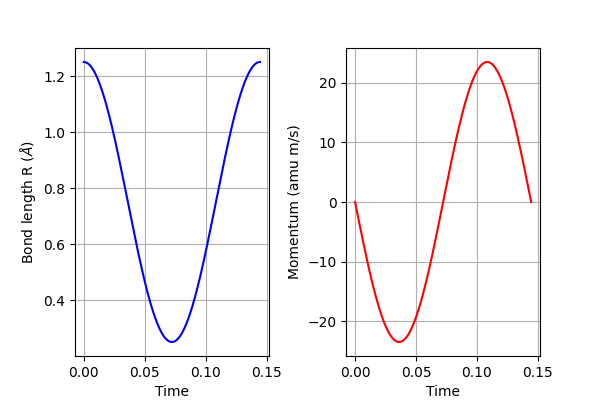

In [4]:
#@title
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import output
output.enable_custom_widget_manager()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#declare globals
xmin=0.751
k = 1020.0
A = 0.5
m = 1.08*1.08/(1.08+1.08)
w = np.sqrt(k/m)
x0=xmin
tstart=0.0
tend=3*2*np.pi/w
tarray = np.linspace(tstart,tend, 2000)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(w,t,A):
    return A*np.cos(w*t)

def harmonic_momentum(w,t,m):
    return -m*w*np.sin(w*t)


# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
#ax[0].set_ylim([0, 400])
#ax[0].set_xlim([0.2,1.3])
ax[1].set_ylabel("Momentum (amu m/s)")
ax[0].set_xlabel("Time")
ax[0].grid(True)
ax[1].set_xlabel("Time")
ax[0].set_ylabel("Bond length R ($\AA$)")
#ax1[1].set_xlim([0.251,1.251])
#ax1[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)
ax[0].plot(tarray, xmin+harmonic_position(w,tarray,A),color='blue')
ax[1].plot(tarray,harmonic_momentum(w,tarray,m),color='red')

Clearly, the momentum and bond length here are related to each other. Instead of plotting them side by side, we can instead plot them on the same graph - to show directly how a change in one leads to a change in the other (and vice versa). 

Such a plot is known as the **phase space** of the molecule. A molecule's phase space is a complete description of how the motion of the atoms in the molecule are determined by their position. 

What does the phase space here look like? Run the following code cell to plot the harmonic potential and corresponding phase space below. Click play to see how the energy of the molecule changes with the H-H bond length as a function of time, and how the bond length and momentum trace out a **trajectory** in phase space. Use the controls to control the speed etc. of the animation.

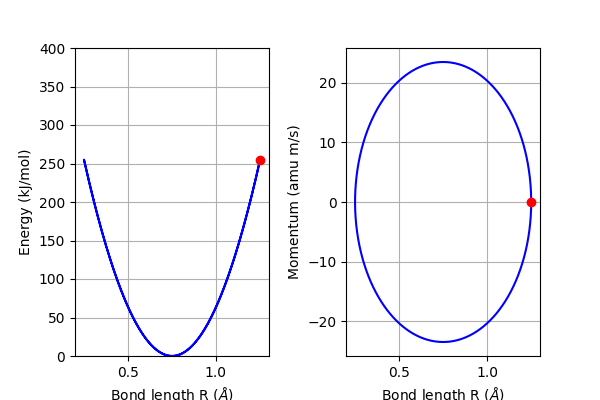

In [5]:
#@title
# create the play widget
play = widgets.Play(
    value=0.751,
    min=0.5,
    max=1.0,
    step=0.01,
    interval=100,
    description="Bond length R ($\AA$)",
    disabled=False,
)

# create the slider widget
slider = widgets.FloatSlider(
    value=0.751,
    min=0.5,
    max=1.0,
    step=0.01,
    description="Bond length R ($\AA$)",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)

# create plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
tarray = np.linspace(tstart,tend, 2000)
ax[0].set_ylim([0, 400])
ax[0].set_xlim([0.2,1.3])
ax[0].set_ylabel("Energy (kJ/mol)")
ax[0].set_xlabel("Bond length R ($\AA$)")
ax[0].grid(True)
ax[1].set_xlabel("Bond length R ($\AA$)")
ax[1].set_ylabel("Momentum (amu m/s)")
ax[1].grid(True)
curve_line0, = ax[0].plot(xmin+harmonic_position(w,tarray,A), harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin),color='blue')
curve_line1, = ax[1].plot(xmin+harmonic_position(w,tarray,A),harmonic_momentum(w,tarray,m),color='blue')
marker_line0, = ax[0].plot(xmin+harmonic_position(w,play.value,A), harmonic_energy(k, xmin+harmonic_position(w,play.value,A), xmin), marker="o", color='red')
marker_line1, = ax[1].plot(xmin+harmonic_position(w,play.value,A), harmonic_momentum(w, play.value, m), marker="o", color='red')

# function to update the marker position
def update_marker(r):
    marker_line0.set_xdata(xmin+harmonic_position(w,r,A))
    marker_line0.set_ydata(harmonic_energy(k,xmin+harmonic_position(w,r,A),xmin))
    marker_line1.set_xdata(xmin+harmonic_position(w,r,A))
    marker_line1.set_ydata(harmonic_momentum(w, r, m))

# function to update the plot
def update_plot(r):
    curve_line0, = ax[0].plot(xmin+harmonic_position(w,tarray,A), harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin),color='blue')
    curve_line1, = ax[1].plot(xmin+harmonic_position(w,tarray,A),harmonic_momentum(w,tarray,m),color='blue')
    update_marker(r)

In [6]:
#@title
# create the animation using FuncAnimation
ani = FuncAnimation(fig, update_plot, frames=np.arange(0.5, 1.0, 0.01), interval=15, repeat=True)

# display the widgets and animation
widgets.VBox([slider, play])
HTML(ani.to_jshtml())


Why is understanding phase space important for running molecular dynamics?? 

**Because it leads to one of the most important aspects of any molecular dynamics simulation - the <u>simulation time step</u>.**

To see why, lets look at the evolution of the bond length $R$ and momentum $p$ over time again. This time, we will use a slightly longer time scale. 

interactive(children=(FloatSlider(value=0.1, description='timestep', max=0.25, min=0.005, step=0.005), Output(…

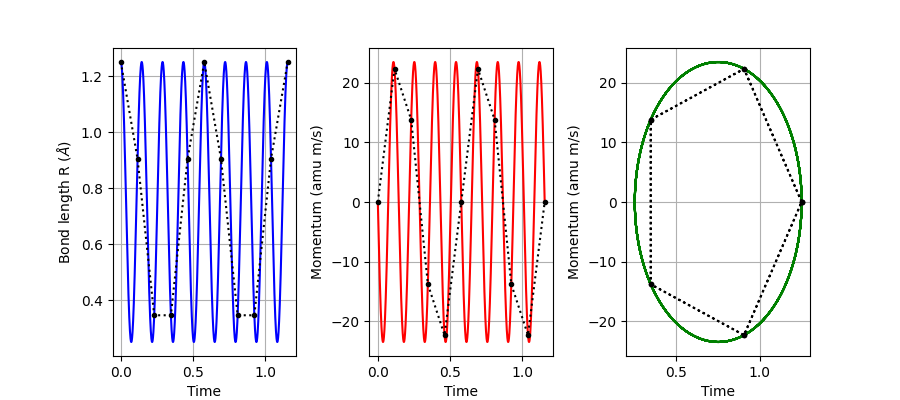

In [24]:
#@title
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import output
output.enable_custom_widget_manager()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#declare globals
xmin=0.751
k = 1020.0
A = 0.5
m = 1.08*1.08/(1.08+1.08)
w = np.sqrt(k/m)
x0=xmin
tstart=0.0
tend=8*2*np.pi/w
tarray = np.linspace(tstart,tend, 2000)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(w,t,A):
    return A*np.cos(w*t)

def harmonic_momentum(w,t,m):
    return -m*w*np.sin(w*t)


# set up plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(9, 4), gridspec_kw={'wspace': 0.4})
#ax[0].set_ylim([0, 400])
#ax[0].set_xlim([0.2,1.3])
ax[1].set_ylabel("Momentum (amu m/s)")
ax[0].set_xlabel("Time")
ax[0].grid(True)
ax[1].set_xlabel("Time")
ax[0].set_ylabel("Bond length R ($\AA$)")
ax[2].set_ylabel("Momentum (amu m/s)")
ax[2].set_xlabel("Bond length R ($\AA$)")
#ax1[1].set_xlim([0.251,1.251])
#ax1[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)
ax[2].grid(True)
ax[0].plot(tarray, xmin+harmonic_position(w,tarray,A),color='blue')
ax[1].plot(tarray,harmonic_momentum(w,tarray,m),color='red')
ax[2].plot(xmin+harmonic_position(w,tarray,A),harmonic_momentum(w,tarray,m),color='green')

@widgets.interact(timestep=(0.005, 0.25, 0.005),continuous_update=True)
def update(timestep = 0.1):
    approx_tarray = np.linspace(tstart,tend, int((tend-tstart)/timestep))
    [l.remove() for l in ax[0].lines]
    [l.remove() for l in ax[1].lines]
    [l.remove() for l in ax[2].lines]
    ax[0].plot(tarray, xmin+harmonic_position(w,tarray,A),color='blue')
    ax[1].plot(tarray,harmonic_momentum(w,tarray,m),color='red')
    ax[2].plot(xmin+harmonic_position(w,tarray,A),harmonic_momentum(w,tarray,m),color='green')
    ax[0].plot(approx_tarray, xmin+harmonic_position(w,approx_tarray,A),color='black',linestyle='dotted',marker='.')
    ax[1].plot(approx_tarray,harmonic_momentum(w,approx_tarray,m),color='black',linestyle='dotted',marker='.')
    ax[2].plot(xmin+harmonic_position(w,approx_tarray,A),harmonic_momentum(w,approx_tarray,m),color='black',linestyle='dotted',marker='.')

The plots above show the **exact** bond length (blue) and momentum (red) curves that we have already seen. They also show an **approximate** value of the bond length and momentum (dotted black lines) that are obtained by simulating the vibration of the H-H bond discretely, i.e. just like we do in any molecular dynamics simulation. 

Use the slider bar to decrease and increase the MD timestep, and consider the following questions. 

1. What do you notice about the description of the bond length, momentum, and trajectory in phase space??
2. Relative to the frequency of the vibration, what would you say is a 'good' time step? Explain your answer